# Exercise with bank marketing data

## Introduction

- Data from the UCI Machine Learning Repository: [data](https://github.com/ga-students/ds-sea-05/blob/master/data/bank-additional.csv), [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal:** Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('../data/bank-additional.csv',names=['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','pdays','previous','poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed','y'],sep=';')[1:]

## Step 2: Prepare at least three features

- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [64]:
# display all column names (for reference)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [65]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
2,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no
3,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
5,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no


### y (response)

In [66]:
# The y values are text.  Convert the values to numeric values and store as a new column 
df['response'] = df['y'].map({'yes':1,'no':0})

In [67]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,response
1,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0
2,39,services,single,high.school,no,no,no,telephone,may,fri,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,no,0
3,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,0
4,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,0
5,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,no,0


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 1 to 4119
Data columns (total 22 columns):
age               4119 non-null object
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null object
campaign          4119 non-null object
pdays             4119 non-null object
previous          4119 non-null object
poutcome          4119 non-null object
emp.var.rate      4119 non-null object
cons.price.idx    4119 non-null object
cons.conf.idx     4119 non-null object
euribor3m         4119 non-null object
nr.employed       4119 non-null object
y                 4119 non-null object
response          4119 non-null int64
dtypes: int64(1), object(21)
memory 

In [69]:
df['age'] = df['age'].apply(pd.to_numeric)


### Evaluate each feature to see if it will to be useful to try in our model.  Add numerical values or dummy variables for category type features as appropriate

### age

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

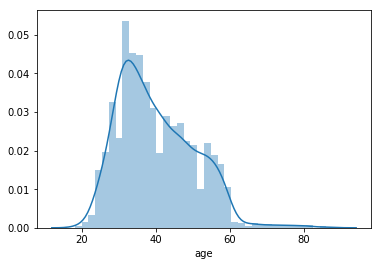

In [71]:
# evaluate the feature
sns.distplot(df['age'])

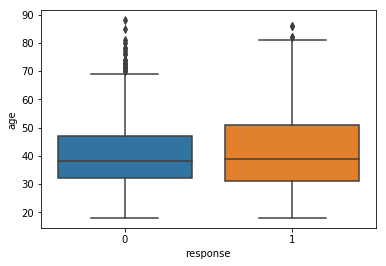

In [72]:
sns.boxplot(x='response',y='age',data=df)

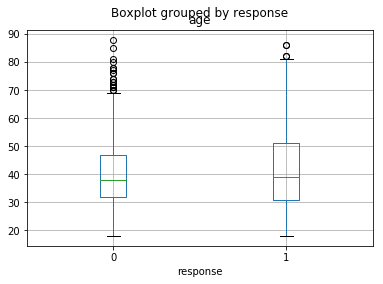

In [73]:
df.boxplot(column='age', by='response')

### job

In [74]:
# evaluate the feature
df['job'].value_counts()

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

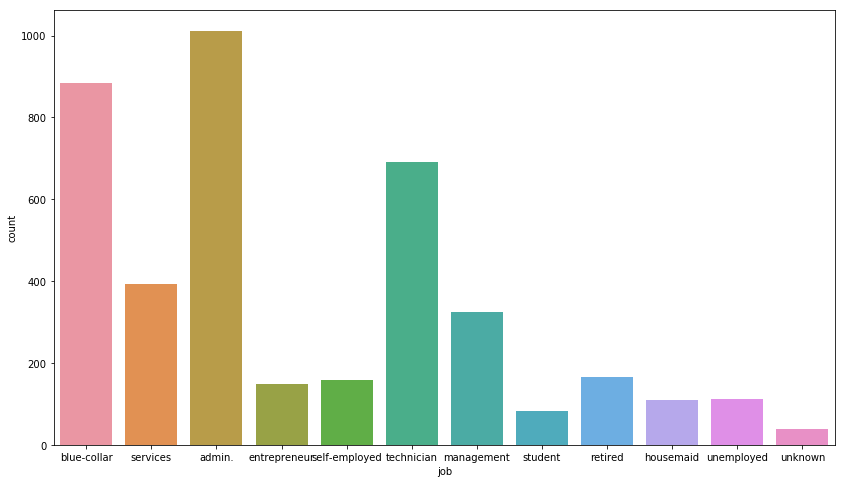

In [75]:
plt.figure(figsize=(14,8))
sns.countplot(df['job'])

In [76]:
df.groupby('job')['response'].mean()

job
admin.           0.131423
blue-collar      0.069005
entrepreneur     0.054054
housemaid        0.100000
management       0.092593
retired          0.228916
self-employed    0.081761
services         0.089059
student          0.231707
technician       0.115774
unemployed       0.171171
unknown          0.102564
Name: response, dtype: float64

In [77]:
job_dummies = pd.get_dummies(df['job'],prefix='Job_',drop_first=True)

### default

In [78]:
# evaluate the feature
df.groupby('default')['response'].mean()

default
no         0.121267
unknown    0.061021
yes        0.000000
Name: response, dtype: float64

In [79]:
df['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [80]:
df['default'] = df['default'].map({'no':0,'unknown':1,'yes':1})
#since there is only 1 yes

### contact

In [59]:
# evaluate the feature
df.groupby('contact')['response'].mean()

contact
cellular     0.141403
telephone    0.051806
Name: response, dtype: float64

In [81]:
df['contact'] = df['contact'].map({'cellular':0,'cellular':1})

### month

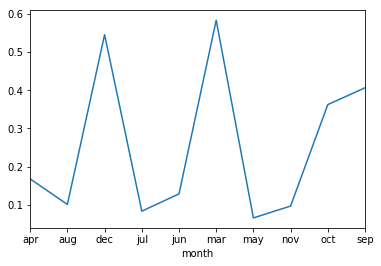

In [83]:
# evaluate the feature
df.groupby('month')['response'].mean().plot()

In [84]:
df.groupby('month')['response'].agg(['count','mean']).sort_values('count')

,count,mean
month,,
dec,22,0.545455
mar,48,0.583333
sep,64,0.406250
oct,69,0.362319
apr,215,0.167442
nov,446,0.096413
jun,530,0.128302
aug,636,0.100629
jul,711,0.082982


### duration

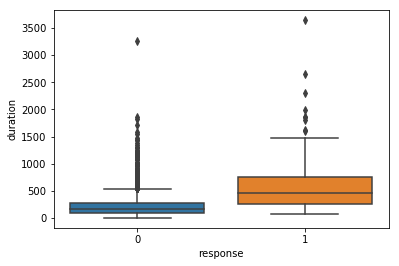

In [89]:
df['duration'] = df['duration'].apply(pd.to_numeric)
sns.boxplot(x='response',y='duration',data=df)

### previous

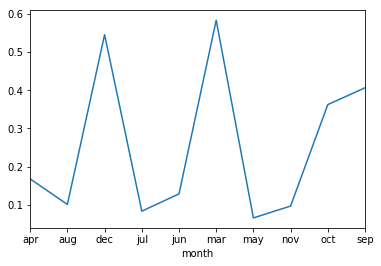

In [90]:
# evaluate the feature
df.groupby('month')['response'].mean().plot()

### poutcome

In [93]:
# evaluate the feature
df.groupby('poutcome')['response'].mean()

poutcome
failure        0.147577
nonexistent    0.082884
success        0.647887
Name: response, dtype: float64

In [94]:
df['poutcome'].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

In [98]:
poutcome_dummies = pd.get_dummies(df.poutcome, prefix='poutcome',drop_first=True)

In [99]:
df=pd.concat([df,poutcome_dummies,job_dummies],axis=1)

### euribor3m

In [102]:
# evaluate the feature
df['euribor3m'] = df['euribor3m'].apply(pd.to_numeric)

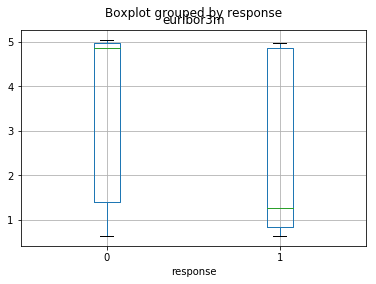

In [103]:
df.boxplot(column='euribor3m', by='response')

## Step 3: Model building

- Use cross-validation to evaluate the AUC of a logistic regression model with your chosen features
- Try to increase the AUC by selecting different sets of features